<a href="https://colab.research.google.com/github/fahmida0404/network-threat-detection/blob/main/notebooks/CSE_CIC_IDS_2018(FS%2BClassification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import  make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from xgboost import XGBClassifier

### **Data Collection**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/IDS/Dataset/CIC-IDS-2018(Preprocessed).csv')

In [ ]:
data.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,37953,5,3,135,127,135,0,27.000000,60.373835,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,368041,5,6,583,1017,560,0,116.600000,248.068136,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,6,94821,3,1,56,0,56,0,18.666667,32.331615,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,1317480,4,6,384,64,128,64,96.000000,36.950417,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,247053,3,4,44,964,44,0,14.666667,25.403412,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [ ]:
data.shape

(1419013, 68)

In [ ]:
# Split the dataset into features and target
X = data.drop('Label', axis=1)
y = data['Label']

In [ ]:
X

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,6,37953,5,3,135,127,135,0,27.000000,60.373835,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0
1,6,368041,5,6,583,1017,560,0,116.600000,248.068136,...,2,20,0.0,0.0,0,0,0.0,0.0,0,0
2,6,94821,3,1,56,0,56,0,18.666667,32.331615,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
3,6,1317480,4,6,384,64,128,64,96.000000,36.950417,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
4,6,247053,3,4,44,964,44,0,14.666667,25.403412,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419008,6,4136655,5,3,935,381,935,0,187.000000,418.144712,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0
1419009,6,4122212,5,3,935,413,935,0,187.000000,418.144712,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0
1419010,6,4122731,5,3,935,335,935,0,187.000000,418.144712,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0
1419011,6,4135673,5,3,935,309,935,0,187.000000,418.144712,...,1,32,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
y.value_counts()

,count
Label,
Benign,1194264
Malicious,224749


**Label Encoding**

In [ ]:
label_mapping = {'Benign': 0, 'Malicious': 1}
y = y.map(label_mapping)

**Train-Test Split**

In [ ]:
X_trainval, X_test, y_trainval, y_test  = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_trainval.shape

(1135210, 67)

In [ ]:
X_test.shape

(283803, 67)

In [ ]:
y_trainval.value_counts()

,count
Label,
0,955411
1,179799


In [ ]:
y_test.value_counts()

,count
Label,
0,238853
1,44950


**Feature Scaling**

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the feature data and transform it
X_trainval = pd.DataFrame(scaler.fit_transform(X_trainval), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [ ]:
X_trainval.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.0,0.041685,0.000333,0.000156,0.000034,0.000035,0.004609,0.0,0.004492,0.008070,...,0.000681,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000312,0.000222,0.000156,0.000018,0.000017,0.002498,0.0,0.003247,0.005051,...,0.000681,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000005,0.000222,0.000156,0.000018,0.000017,0.002498,0.0,0.003247,0.005051,...,0.000681,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000276,0.000222,0.000156,0.000038,0.000034,0.005214,0.0,0.006776,0.010542,...,0.000681,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.036115,0.000443,0.000104,0.000107,0.000012,0.014510,0.0,0.011313,0.022723,...,0.000681,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.0,0.036243,0.000443,0.000156,0.000107,0.000023,0.014510,0.0,0.011313,0.022723,...,0.000681,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.034132,0.000443,0.000104,0.000107,0.000012,0.014510,0.0,0.011313,0.022723,...,0.000681,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.019347,0.000776,0.000313,0.000131,0.000057,0.010506,0.0,0.008651,0.012389,...,0.003406,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.021838,0.000887,0.000313,0.000131,0.000057,0.010506,0.0,0.007717,0.011884,...,0.003406,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.043626,0.000998,0.000313,0.000130,0.000057,0.010506,0.0,0.006885,0.011391,...,0.003406,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Feature Selection**

In [ ]:
ig = mutual_info_classif(X_trainval, y_trainval) #Information Gain method

In [ ]:
# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print all feature importance scores
print("Feature Importance Scores:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.3f}")

Feature Importance Scores:
Fwd Pkt Len Std: 0.526
Fwd Seg Size Avg: 0.511
Fwd Pkt Len Mean: 0.510
Fwd Pkt Len Max: 0.498
Init Bwd Win Byts: 0.443
Bwd Pkt Len Max: 0.430
Bwd Pkt Len Std: 0.425
Bwd Pkt Len Mean: 0.421
Bwd Seg Size Avg: 0.421
Subflow Bwd Byts: 0.416
TotLen Bwd Pkts: 0.416
Subflow Fwd Byts: 0.394
TotLen Fwd Pkts: 0.394
Bwd IAT Min: 0.297
Fwd IAT Min: 0.292
Fwd Pkts/s: 0.278
Fwd Header Len: 0.273
Bwd IAT Std: 0.269
Init Fwd Win Byts: 0.269
Bwd IAT Mean: 0.264
Fwd IAT Std: 0.264
Bwd Pkts/s: 0.261
Fwd IAT Mean: 0.251
Tot Fwd Pkts: 0.236
Subflow Fwd Pkts: 0.235
Bwd Header Len: 0.232
Fwd IAT Max: 0.218
Fwd IAT Tot: 0.207
Bwd IAT Tot: 0.192
Pkt Len Max: 0.192
Subflow Bwd Pkts: 0.191
Tot Bwd Pkts: 0.191
Bwd IAT Max: 0.191
Flow IAT Max: 0.190
Flow IAT Std: 0.187
Down/Up Ratio: 0.185
Flow IAT Mean: 0.185
Flow Pkts/s: 0.184
Flow Duration: 0.179
PSH Flag Cnt: 0.178
Pkt Len Std: 0.170
Pkt Len Var: 0.169
Flow Byts/s: 0.153
Pkt Len Mean: 0.146
Pkt Size Avg: 0.140
ACK Flag Cnt: 0.131
ECE

In [ ]:
threshold = 0.1
selected_features = [column for column in feature_scores.keys() if feature_scores[column]>=threshold]
# Select features only in dataframe
X_trainval = X_trainval[selected_features]
X_test = X_test[selected_features]

In [ ]:
X_trainval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135210 entries, 0 to 1135209
Data columns (total 48 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Flow Duration      1135210 non-null  float64
 1   Tot Fwd Pkts       1135210 non-null  float64
 2   Tot Bwd Pkts       1135210 non-null  float64
 3   TotLen Fwd Pkts    1135210 non-null  float64
 4   TotLen Bwd Pkts    1135210 non-null  float64
 5   Fwd Pkt Len Max    1135210 non-null  float64
 6   Fwd Pkt Len Mean   1135210 non-null  float64
 7   Fwd Pkt Len Std    1135210 non-null  float64
 8   Bwd Pkt Len Max    1135210 non-null  float64
 9   Bwd Pkt Len Mean   1135210 non-null  float64
 10  Bwd Pkt Len Std    1135210 non-null  float64
 11  Flow Byts/s        1135210 non-null  float64
 12  Flow Pkts/s        1135210 non-null  float64
 13  Flow IAT Mean      1135210 non-null  float64
 14  Flow IAT Std       1135210 non-null  float64
 15  Flow IAT Max       1135210 non-n

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283803 entries, 0 to 283802
Data columns (total 48 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow Duration      283803 non-null  float64
 1   Tot Fwd Pkts       283803 non-null  float64
 2   Tot Bwd Pkts       283803 non-null  float64
 3   TotLen Fwd Pkts    283803 non-null  float64
 4   TotLen Bwd Pkts    283803 non-null  float64
 5   Fwd Pkt Len Max    283803 non-null  float64
 6   Fwd Pkt Len Mean   283803 non-null  float64
 7   Fwd Pkt Len Std    283803 non-null  float64
 8   Bwd Pkt Len Max    283803 non-null  float64
 9   Bwd Pkt Len Mean   283803 non-null  float64
 10  Bwd Pkt Len Std    283803 non-null  float64
 11  Flow Byts/s        283803 non-null  float64
 12  Flow Pkts/s        283803 non-null  float64
 13  Flow IAT Mean      283803 non-null  float64
 14  Flow IAT Std       283803 non-null  float64
 15  Flow IAT Max       283803 non-null  float64
 16  Fw

### **Evaluation metrics**

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #5 fold cv

In [ ]:
def tnr_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def fpr_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn)

def fnr_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn / (fn + tp)

In [ ]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'tpr': make_scorer(recall_score),  # TPR = recall for class 1
    'tnr': make_scorer(tnr_score), # TNR for class 0
    'fpr': make_scorer(fpr_score),
    'fnr': make_scorer(fnr_score),
    'f1_score': make_scorer(f1_score),  # F1-score for class 1
}

### **Classification**

In [ ]:
DT = DecisionTreeClassifier(max_depth=3, criterion='entropy',random_state=42)
KNN = KNeighborsClassifier(n_neighbors=3)
NB = GaussianNB()
LR = LogisticRegression(random_state=42, C=10, n_jobs=-1)
RF = RandomForestClassifier(n_estimators=3, max_depth=3, criterion='entropy', random_state=42, n_jobs=-1)
XGB = XGBClassifier(n_estimators=4, max_depth=3, eta=0.4, alpha=1, random_state=42, n_jobs=-1)

**Decision Tree**

In [ ]:
start_time = time.time()
results = cross_validate(DT, X_trainval, y_trainval, cv=skf, scoring=scoring, n_jobs=-1) #Obtain evaluation metrics

# Display average scores across all folds
print("\nAverage Accuracy:", results['test_accuracy'].mean())
print("Average Sensitivity (TPR):", results['test_tpr'].mean())
print("Average Specificity (TNR):", results['test_tnr'].mean())
print("Average FPR:", results['test_fpr'].mean())
print("Average FNR: ", results['test_fnr'].mean())
print("Average F1-score:", results['test_f1_score'].mean())

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")


Average Accuracy: 0.9897190828128716
Average Sensitivity (TPR): 0.940989656029279
Average Specificity (TNR): 0.9988894831527814
Average FPR: 0.0011105168472186136
Average FNR:  0.059010343970721066
Average F1-score: 0.9666588506871197

Execution Time: 85.84646439552307 seconds

Execution Time: 1.4307744065920511 minutes


In [ ]:
start_time = time.time()

DT.fit(X_trainval, y_trainval)
y_pred = DT.predict(X_test)
y_pred_dt = DT.predict_proba(X_test)[:, 1] #prediction probabilities for roc

accuracy = accuracy_score(y_test, y_pred)
tpr = recall_score(y_test, y_pred)
tnr = tnr_score(y_test, y_pred)
fpr = fpr_score(y_test, y_pred)
fnr = fnr_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Sensitivity (TPR):", tpr)
print("Specificity (TNR):", tnr)
print("FPR:", fpr)
print("FNR:", fnr)
print("F1-score:", f1)

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")

Accuracy: 0.9897886914514645
Sensitivity (TPR): 0.9412235817575083
Specificity (TNR): 0.9989282110754313
FPR: 0.0010717889245686677
FNR: 0.058776418242491656
F1-score: 0.9668852983522637

Execution Time: 21.874053239822388 seconds

Execution Time: 0.3645675539970398 minutes


**Naive Bayes**

In [ ]:
start_time = time.time()
results = cross_validate(NB, X_trainval, y_trainval, cv=skf, scoring=scoring, n_jobs=-1) #Obtain evaluation metrics

# Display average scores across all folds
print("\nAverage Accuracy:", results['test_accuracy'].mean())
print("Average Sensitivity (TPR):", results['test_tpr'].mean())
print("Average Specificity (TNR):", results['test_tnr'].mean())
print("Average FPR:", results['test_fpr'].mean())
print("Average FNR: ", results['test_fnr'].mean())
print("Average F1-score:", results['test_f1_score'].mean())

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")


Average Accuracy: 0.9688506972278257
Average Sensitivity (TPR): 0.9927418958886591
Average Specificity (TNR): 0.9643546072956777
Average FPR: 0.035645392704322265
Average FNR:  0.007258104111340993
Average F1-score: 0.9098740964083236

Execution Time: 8.952152013778687 seconds

Execution Time: 0.1492025335629781 minutes


In [ ]:
start_time = time.time()

NB.fit(X_trainval, y_trainval)
y_pred = NB.predict(X_test)
y_pred_nb = NB.predict_proba(X_test)[:, 1] #prediction probabilities for roc

accuracy = accuracy_score(y_test, y_pred)
tpr = recall_score(y_test, y_pred)
tnr = tnr_score(y_test, y_pred)
fpr = fpr_score(y_test, y_pred)
fnr = fnr_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Sensitivity (TPR):", tpr)
print("Specificity (TNR):", tnr)
print("FPR:", fpr)
print("FNR:", fnr)
print("F1-score:", f1)

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")

Accuracy: 0.9687635437257535
Sensitivity (TPR): 0.9930367074527252
Specificity (TNR): 0.964195551238628
FPR: 0.03580444876137206
FNR: 0.00696329254727475
F1-score: 0.9096689389539326

Execution Time: 1.8926775455474854 seconds

Execution Time: 0.031544625759124756 minutes


**Logistic Regression**

In [ ]:
start_time = time.time()
results = cross_validate(LR, X_trainval, y_trainval, cv=skf, scoring=scoring, n_jobs=-1) #Obtain evaluation metrics

# Display average scores across all folds
print("\nAverage Accuracy:", results['test_accuracy'].mean())
print("Average Sensitivity (TPR):", results['test_tpr'].mean())
print("Average Specificity (TNR):", results['test_tnr'].mean())
print("Average FPR:", results['test_fpr'].mean())
print("Average FNR: ", results['test_fnr'].mean())
print("Average F1-score:", results['test_f1_score'].mean())

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")


Average Accuracy: 0.9972551334114392
Average Sensitivity (TPR): 0.9951000804556147
Average Specificity (TNR): 0.9976606928315215
Average FPR: 0.002339307168478408
Average FNR:  0.00489991954438532
Average F1-score: 0.9913674794683995

Execution Time: 27.03489923477173 seconds

Execution Time: 0.45058165391286215 minutes


In [ ]:
start_time = time.time()

LR.fit(X_trainval, y_trainval)
y_pred = LR.predict(X_test)
y_pred_lr = LR.predict_proba(X_test)[:, 1] #prediction probabilities for roc

accuracy = accuracy_score(y_test, y_pred)
tpr = recall_score(y_test, y_pred)
tnr = tnr_score(y_test, y_pred)
fpr = fpr_score(y_test, y_pred)
fnr = fnr_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Sensitivity (TPR):", tpr)
print("Specificity (TNR):", tnr)
print("FPR:", fpr)
print("FNR:", fnr)
print("F1-score:", f1)

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")

Accuracy: 0.9972762796728717
Sensitivity (TPR): 0.9951501668520578
Specificity (TNR): 0.997676395104939
FPR: 0.002323604895060979
FNR: 0.004849833147942158
F1-score: 0.9914336691157729

Execution Time: 7.6369147300720215 seconds

Execution Time: 0.12728191216786702 minutes


**Random Forest**

In [ ]:
start_time = time.time()
results = cross_validate(RF, X_trainval, y_trainval, cv=skf, scoring=scoring, n_jobs=-1) #Obtain evaluation metrics

# Display average scores across all folds
print("\nAverage Accuracy:", results['test_accuracy'].mean())
print("Average Sensitivity (TPR):", results['test_tpr'].mean())
print("Average Specificity (TNR):", results['test_tnr'].mean())
print("Average FPR:", results['test_fpr'].mean())
print("Average FNR: ", results['test_fnr'].mean())
print("Average F1-score:", results['test_f1_score'].mean())

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")


Average Accuracy: 0.9972560143057232
Average Sensitivity (TPR): 0.9877974923609856
Average Specificity (TNR): 0.9990360169755732
Average FPR: 0.0009639830244268722
Average FNR:  0.012202507639014534
Average F1-score: 0.9913055054218219

Execution Time: 27.201834201812744 seconds

Execution Time: 0.45336390336354576 minutes


In [ ]:
start_time = time.time()

RF.fit(X_trainval, y_trainval)
y_pred = RF.predict(X_test)
y_pred_rf = RF.predict_proba(X_test)[:, 1] #prediction probabilities for roc

accuracy = accuracy_score(y_test, y_pred)
tpr = recall_score(y_test, y_pred)
tnr = tnr_score(y_test, y_pred)
fpr = fpr_score(y_test, y_pred)
fnr = fnr_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Sensitivity (TPR):", tpr)
print("Specificity (TNR):", tnr)
print("FPR:", fpr)
print("FNR:", fnr)
print("F1-score:", f1)

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")

Accuracy: 0.9973573218042092
Sensitivity (TPR): 0.9885650723025584
Specificity (TNR): 0.9990119445851633
FPR: 0.0009880554148367405
FNR: 0.011434927697441602
F1-score: 0.9916315190466627

Execution Time: 8.151010513305664 seconds

Execution Time: 0.13585017522176107 minutes


**XGBoost**

In [ ]:
start_time = time.time()
results = cross_validate(XGB, X_trainval, y_trainval, cv=skf, scoring=scoring, n_jobs=-1) #Obtain evaluation metrics

# Display average scores across all folds
print("\nAverage Accuracy:", results['test_accuracy'].mean())
print("Average Sensitivity (TPR):", results['test_tpr'].mean())
print("Average Specificity (TNR):", results['test_tnr'].mean())
print("Average FPR:", results['test_fpr'].mean())
print("Average FNR: ", results['test_fnr'].mean())
print("Average F1-score:", results['test_f1_score'].mean())

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")


Average Accuracy: 0.998868050845218
Average Sensitivity (TPR): 0.9940099797257048
Average Specificity (TNR): 0.9997822924901699
Average FPR: 0.0002177075098300593
Average FNR:  0.005990020274295212
Average F1-score: 0.9964178959480339

Execution Time: 41.190855741500854 seconds

Execution Time: 0.6865142623583476 minutes


In [ ]:
start_time = time.time()

XGB.fit(X_trainval, y_trainval)
y_pred = XGB.predict(X_test)
y_pred_xgb = XGB.predict_proba(X_test)[:, 1] #prediction probabilities for roc

accuracy = accuracy_score(y_test, y_pred)
tpr = recall_score(y_test, y_pred)
tnr = tnr_score(y_test, y_pred)
fpr = fpr_score(y_test, y_pred)
fnr = fnr_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Sensitivity (TPR):", tpr)
print("Specificity (TNR):", tnr)
print("FPR:", fpr)
print("FNR:", fnr)
print("F1-score:", f1)

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")

Accuracy: 0.998812556597358
Sensitivity (TPR): 0.9938153503893215
Specificity (TNR): 0.9997529861462908
FPR: 0.00024701385370918513
FNR: 0.006184649610678532
F1-score: 0.9962422363711377

Execution Time: 10.300707578659058 seconds

Execution Time: 0.17167845964431763 minutes


### **ROC Curve**

In [ ]:
# All prediction probabilities in one dataframe
models = pd.DataFrame({"Decision Tree": y_pred_dt,
                       "Naive Bayes": y_pred_nb,
                       "Logistic Regression": y_pred_lr,
                       "Random Forest": y_pred_rf,
                       "XGBoost": y_pred_xgb})

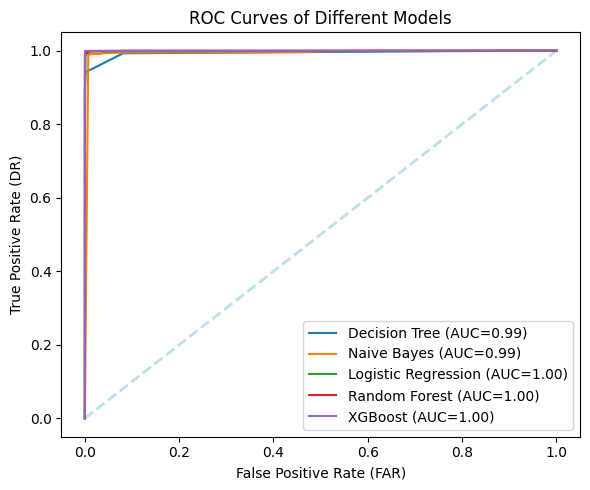

In [ ]:
plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='lightblue', alpha=0.8)

for model in models.columns:
  fpr, tpr, _ = roc_curve(y_test, models[model])
  auc_score = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=f"{model} (AUC={auc_score:.2f})")

plt.title("ROC Curves of Different Models")
plt.xlabel('False Positive Rate (FAR)')
plt.ylabel('True Positive Rate (DR)')
plt.legend()

plt.tight_layout()
plt.show()